# Assignment 3

Linda Koine, Jens Weidmann, Markus Wiktorin

# 2.1

## Error-correlation
$\Delta w_{kj}(n) = \eta e_k(n)x_j(n)$

$\Delta w_{kj}(n) = $ change of weights

$\eta = $ rate of learning

$e_k(n) = d_k(n) - y_k(n) = $ error between desired and actual output of net

$x_j(n) = $ input signal

* Error-correction learning
* Delta of synptic weights is proportional to the product of the error signal and the input signal
* Uses learning rate parameter
* Minimization of a cost function: $\theta(n) = \frac{1}{2}*e_{k}^2(n)$
* Assumption error signal is directly measurable
* That means supply of desired response

## Hebbian
$\Delta w_{kj}(n) = \eta y_k(n)x_j(n)$

$\Delta w_{kj}(n) = $ change of weights

$\eta = $ rate of learning

$y_k(n) = $ output signal

$x_j(n) = $ input signal

* Two-part rule:
    1. if two neurons are activated synchronously, then the strength of their connection is increased
	2. if two neurons are activated asynchronously, then the strength of their connection is weakend.
* Time-dependent mechanism: modification of a synapse depends on the time of occurence of the pre-  and postsynaptic signals
* Local mechanism: information bearing signals are in spatiotemporal contiguity
* Interactive mechansim: depends on interaction between pre and post synaptic signals
* Conjunctional or correlation mechanism: correlation over time between pre- and postsynaptic  signals $\rightarrow$ synaptic change

## Differences
- Hebbian is unsupervised (no desired data) while error-correlation is supervised learning
- In Hebbian learning the weights are increased if input and output are high, in error-correlcation the error counts

# 2.10

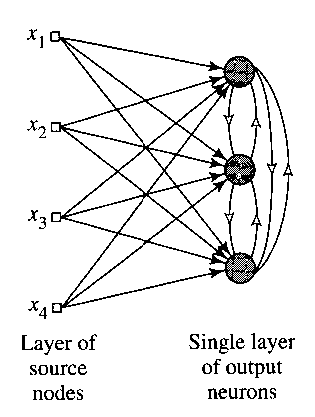

In [1]:
from IPython.display import Image
Image("fig_2_4.png")

$y_1 = \varphi(x_1 * w_{11} + x_2 * w_{21} + x_3 * w_{31} + x_4 * w_{41})$

$y_2 = \varphi(x_1 * w_{12} + x_2 * w_{22} + x_3 * w_{32} + x_4 * w_{42})$

$y_3 = \varphi(x_1 * w_{13} + x_2 * w_{23} + x_3 * w_{33} + x_4 * w_{43})$

$o_1 = y_1 + c_{21} * y_2 + c_{31} * y_3$

$o_2 = c_{12} * y_1 + y_2 + c_{32} * y_3$

$o_3 = c_{31} * y_1 + c_{23} * y_2 + y_3$

$C = 
\begin{bmatrix}
1 & -\epsilon & -\epsilon\\
-\epsilon & 1 & -\epsilon\\
-\epsilon & -\epsilon & 1
\end{bmatrix}
$

Repeat $o_k$ until it is 0 or all other neurons are 0.
The neuron wins if it has the largest $y_k$.

# 2.21

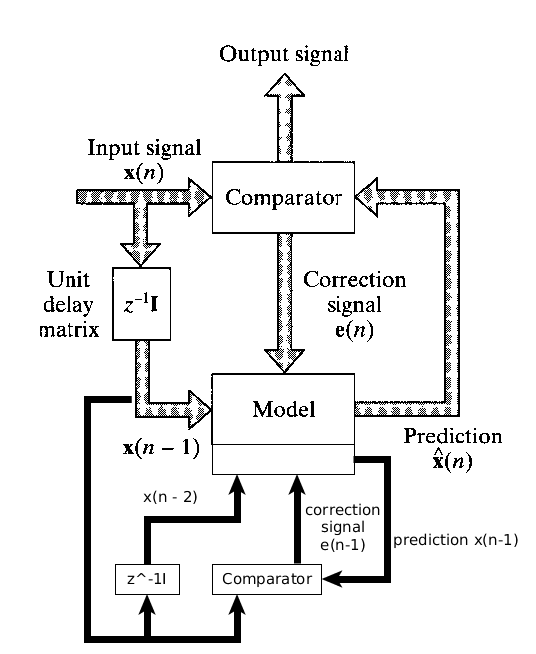

In [290]:
from IPython.display import Image
Image("graph2_21.png")

# Homework_3_5

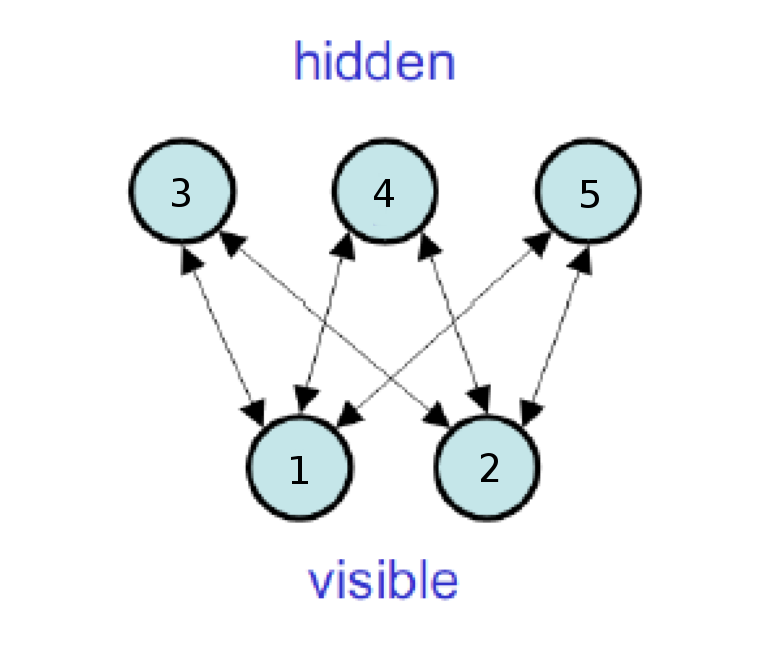

In [2]:
from IPython.display import Image
Image("boltzmann.png")

In [184]:
import numpy as np

In [185]:
def energy(weights, neurons):
    e = 0
    for j in range(5):
        for k in range(5):
            e = e + weights[j, k] * neurons[j] * neurons[k]
    return -0.5 * e

In [186]:
def prob(weights, neurons, t, k):
    flipped_neurons = np.array(neurons)
    flipped_neurons[k] = 1 - neurons[k]
    return 1. / (1 + np.exp(-(energy(weights, neurons) - energy(weights \
                                                , flipped_neurons)) / t))

In [289]:
def corr(weights, neurons, clamped, t, k, j):
    tmp_neurons = np.array(neurons)
    if clamped:
        r = range(2, 5)
    else:
        r = range(5)
    for i in r:
        if prob(weights, neurons, t, i) > np.random.rand():
            tmp_neurons[i] = 1 - tmp_neurons[i]            
    
    return tmp_neurons[k] * tmp_neurons[j]

In [230]:
def update_weights(weights, neurons, temp):
    new_weights = np.array(weights)
    for k in range(5):
        for j in range(5):
            if k == j:
                continue
            d_corr = corr(weights, neurons, True, temp, j, k) - \
                corr(weights, neurons, False, temp, j, k)
            new_weights[j, k] = weights[j, k] + learning_rate * d_corr
    return new_weights

In [288]:
learning_rate = 0.5
temp = 1
training = np.array([[0, 1],
                     [1, 0]])

weights = np.zeros((5, 5))
for x in range(2):
    for y in range(2, 5):
        weights[y, x] = np.random.rand()
        
for y in range(2):
    for x in range(2, 5):
        weights[y, x] = np.random.rand()

neurons = np.round(np.random.rand(1, 5))[0]

print("initial weights\n", weights)

for i in range(np.size(training, 0)):
    neurons[0:2] = training[i,:]
    print("neurons", neurons)
    print("apply training", training[i,:])
    weights = update_weights(weights, neurons, temp)
    print("new weights\n", weights)
    #print(np.column_stack((weights[:,0:2], np.zeros((5, 3)))), "*", neurons)
    neurons[2:5] = np.round(np.dot(np.column_stack((weights[:,0:2], \
                                np.zeros((5, 3)))), neurons))[2:5]
    #print(np.row_stack((weights[0:2], np.zeros((3,5)))), "*", neurons)
    neurons[0:2] = np.round(np.dot(np.row_stack((weights[0:2], np.zeros((3,5)))), neurons))[0:2]
    neurons[np.where(neurons > 1)] = 1
    neurons[np.where(neurons < 0)] = 0

print("final neurons", neurons)


initial weights
 [[ 0.          0.          0.40928352  0.34852408  0.31687903]
 [ 0.          0.          0.80819015  0.97943596  0.30341213]
 [ 0.19012316  0.78468078  0.          0.          0.        ]
 [ 0.98935426  0.18968286  0.          0.          0.        ]
 [ 0.44360318  0.48044714  0.          0.          0.        ]]
neurons [ 0.  1.  0.  0.  0.]
apply training [0 1]
new weights
 [[ 0.          0.          0.40928352  0.34852408  0.31687903]
 [ 0.          0.          0.80819015  0.97943596  0.30341213]
 [ 0.19012316  1.28468078  0.          0.          0.        ]
 [ 0.98935426  0.18968286  0.          0.          0.        ]
 [-0.05639682  0.98044714  0.          0.          0.        ]]
neurons [ 1.  0.  1.  0.  1.]
apply training [1 0]
new weights
 [[ 0.          0.          0.40928352  0.34852408  0.31687903]
 [ 0.          0.          0.80819015  0.97943596  0.30341213]
 [ 0.69012316  1.28468078  0.          0.          0.        ]
 [ 1.48935426 -0.31031714  0.     